In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,10)
import math
import random

# 8.2 Density Estimation

In [2]:
data = [0.5, 0.7, 0.8, 1.9, 2.4, 6.1, 6.2, 7.3]

## 8.2.1 Histogram estimator

### EQ (8.3) simple histogram estimator

In [3]:
def histogram_estimator(x, data, h, origin):
    lower = ((x-origin)//h)*h + origin
    higher = lower+h
    n = sum(1 for d in data if lower < d <= higher)
    N = len(data)
    return n/(N*h)

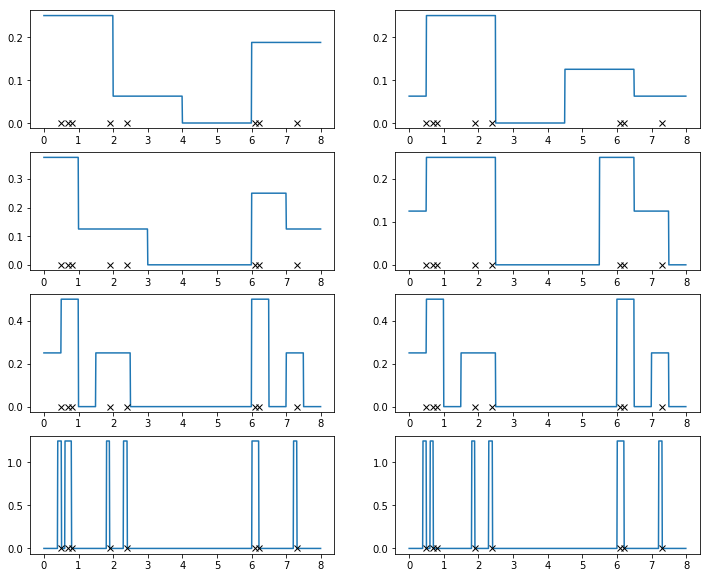

In [4]:
hs = [2, 1, 0.5, 0.1]
origins = [0, 0.5]
xs = np.arange(0, 8, 0.01)
for i, h in enumerate(hs):
    for j, origin in enumerate(origins):
        r = len(hs)
        c = len(origins)
        plt.subplot(r, c, (c*i)+j+1)
        plt.plot(xs, [histogram_estimator(x, data, h, origin) for x in xs])
        plt.plot(data, [0]*len(data), 'xk')
    


### EQ (8.4) naive estimator

In [5]:
def naive_estimator(x, data, h):
    n = sum(1 for d in data if x-h/2 < d <= x+h/2)
    N = len(data)
    return n/(N*h)

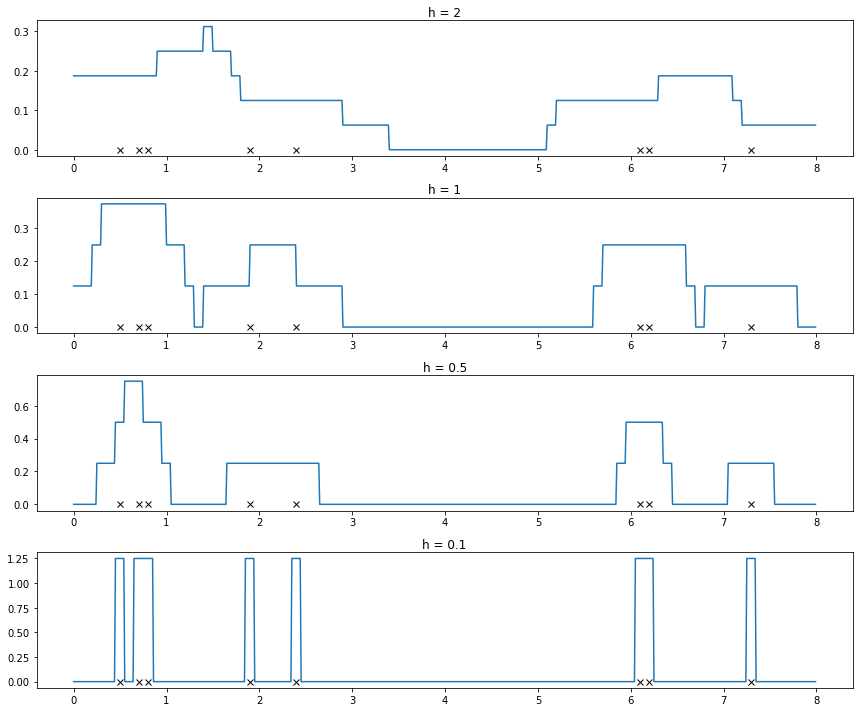

In [6]:
hs = [2, 1, 0.5, 0.1]
xs = np.arange(0, 8, 0.01)
for i, h in enumerate(hs):
    r = len(hs)
    plt.subplot(r, 1, i+1)
    plt.plot(xs, [naive_estimator(x, data, h) for x in xs])
    plt.plot(data, [0]*len(data), 'xk')
    plt.title("h = {}".format(h))
plt.tight_layout()

## 8.2.2 Kernel Estimators

### EQ (8.6) gaussian kernel

In [7]:
def gaussian_kernel(u):
    return 1.0/math.sqrt(2*math.pi)*math.exp(-(u*u)/2)

### EQ (8.7) kernel estimator

In [8]:
def kernel_estimator(x, data, h, kernel):
    N = len(data)
    return 1/(N*h) * sum(kernel((x-d)/h) for d in data)

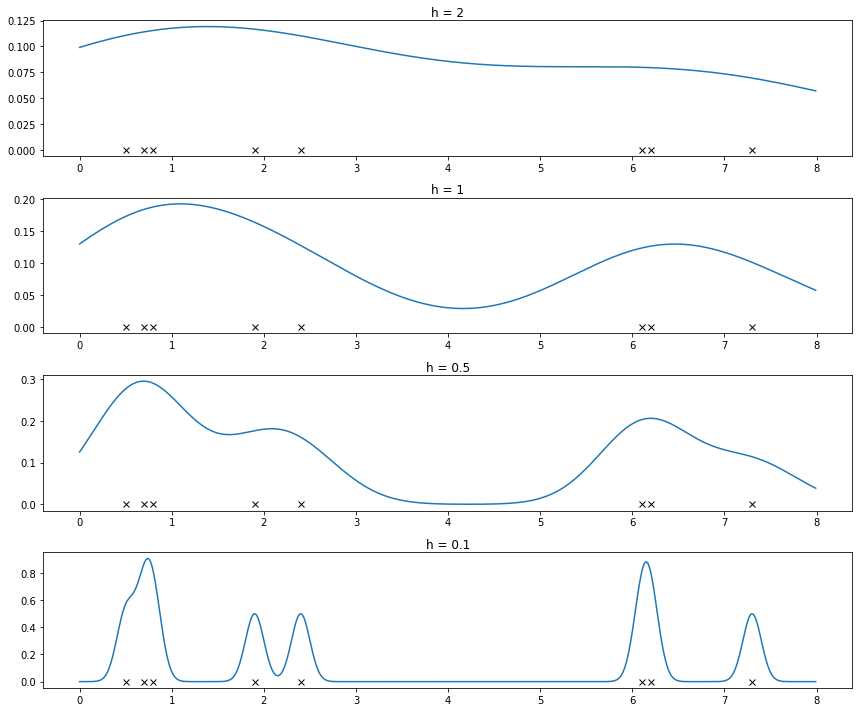

In [9]:
hs = [2, 1, 0.5, 0.1]
xs = np.arange(0, 8, 0.01)
for i, h in enumerate(hs):
    r = len(hs)
    plt.subplot(r, 1, i+1)
    plt.plot(xs, [kernel_estimator(x, data, h, gaussian_kernel) for x in xs])
    plt.plot(data, [0]*len(data), 'xk')
    plt.title("h = {}".format(h))
plt.tight_layout()

## 8.2.3 k-Nearest Neighbor Estimator

### EQ (8.8) simple knn estimator

In [10]:
def k_nearest_estimator(x, data, k):
    dists = [abs(x - d) for d in data]
    sorted_dists = sorted(dists)
    dist_k = sorted_dists[k]
    N = len(data)
    return k/(2*N*dist_k)

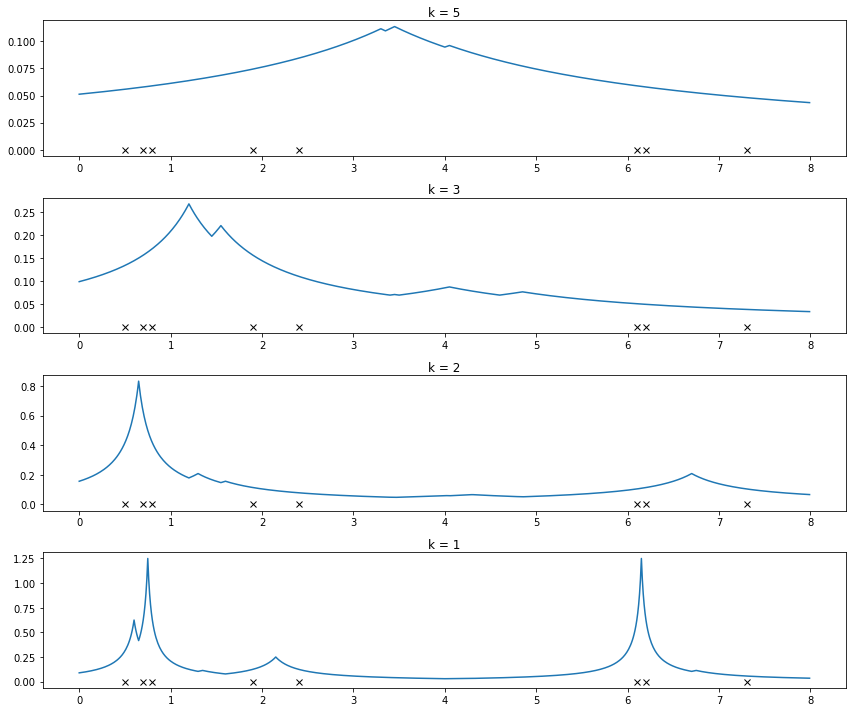

In [11]:
ks = [5, 3, 2, 1]
xs = np.arange(0, 8, 0.01)
for i, k in enumerate(ks):
    r = len(ks)
    plt.subplot(r, 1, i+1)
    plt.plot(xs, [k_nearest_estimator(x, data, k) for x in xs])
    plt.plot(data, [0]*len(data), 'xk')
    plt.title("k = {}".format(k))
plt.tight_layout()

### EQ (8.9) gaussian smoothed knn estimator

In [12]:
def k_nn_smoothed_kernel_estimator(x, data, k, kernel):
    dists = [abs(x - d) for d in data]
    sorted_dists = sorted(dists)
    dist_k = sorted_dists[k]
    N = len(data)
    return 1/(N*dist_k) * sum(kernel((x - d)/dist_k) for d in data)

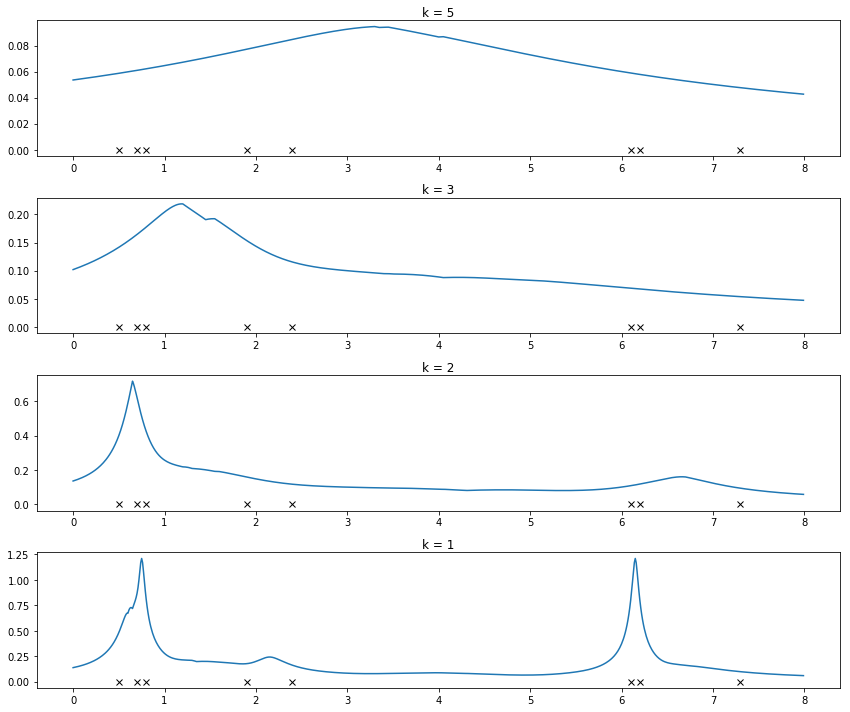

In [13]:
ks = [5, 3, 2, 1]
xs = np.arange(0, 8, 0.01)
for i, k in enumerate(ks):
    r = len(ks)
    plt.subplot(r, 1, i+1)
    plt.plot(xs, [k_nn_smoothed_kernel_estimator(x, data, k, gaussian_kernel) for x in xs])
    plt.plot(data, [0]*len(data), 'xk')
    plt.title("k = {}".format(k))
plt.tight_layout()

# 8.3 Multivariate Data

In [14]:
random.seed(42)
data2D = [(random.uniform(0, 10), random.uniform(0, 10)) for _ in range(20)]

### EQ (8.11) multivariate gaussian kernel

In [15]:
def multivariate_gaussian_kernel(u):
    d = len(u)
    return ((1/(math.sqrt(2*math.pi)))**d)*math.exp(-sum(t**2 for t in u)/2)

### EQ (8.10) multivariate kernel density estimator

In [16]:
def multivariate_kernel_estimator(x_tup, data, h, multi_kernel):
    d = len(data[0])
    N = len(data)
    return 1.0/(N * h**d) * sum(multi_kernel([(x - dat)/h for x, dat in zip(x_tup, dat_tup)]) for dat_tup in data)

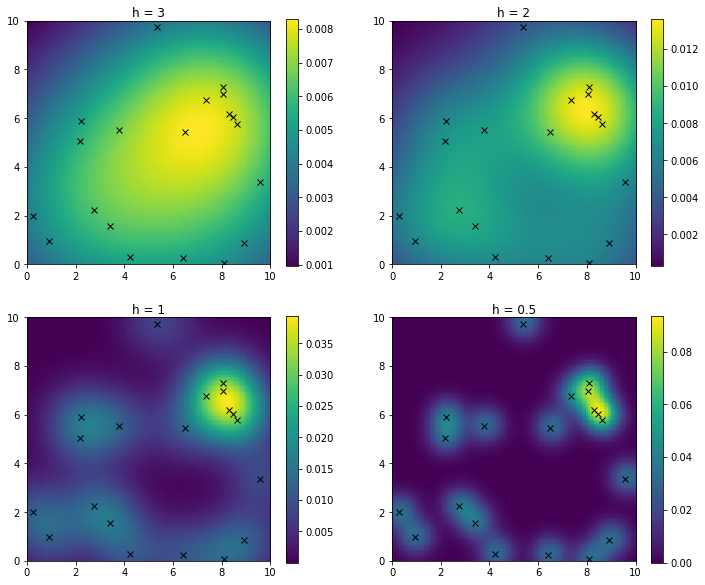

In [17]:
hs = [3, 2, 1, 0.5]
xs = np.arange(0, 10, 0.1)
ys = np.arange(0, 10, 0.1)
for i,h in enumerate(hs):
    plt.subplot(2,2,i+1)
    responses = [[multivariate_kernel_estimator((x, y), data2D, h, multivariate_gaussian_kernel) for x in xs] for y in ys]
    plt.imshow(responses, extent=(0,10,0,10), origin='lower')
    plt.plot(*zip(*data2D), 'xk')
    plt.title('h = {}'.format(h))
    plt.colorbar()

# 8.4 Classification

In [18]:
random.seed(42)
nClasses = 2
classBounds = [(0, 7), (3, 10)]
nSamples = [5, 5]
classData2D = [[(random.uniform(*classBounds[i]), random.uniform(*classBounds[i])) for _ in range(nSamples[i])] for i in range(nClasses)]

colors = ['C0', 'C3']
from matplotlib.colors import LinearSegmentedColormap
colormap = LinearSegmentedColormap.from_list('',[
            matplotlib.colors.to_rgba(colors[0], alpha = 0.4),
            (1,1,1),
            matplotlib.colors.to_rgba(colors[1], alpha = 0.4)])

### EQ (8.14) classifier based on class conditional kernel density estimator

In [19]:
def class_conditional_kernel_classifier(x_tup, data, h, multi_kernel):
    d = len(data[0][0])
    N = sum(len(class_dat) for class_dat in data)
    class_responses = [
        1/(N*h**d) * sum(multi_kernel([(x - x_c)/h for x, x_c in zip(x_tup, x_c_tup)]) for x_c_tup in class_data)
        for class_data in data
    ]
    if sum(class_responses) == 0:
        return (len(class_responses) - 1) / 2
    return class_responses.index(max(class_responses))

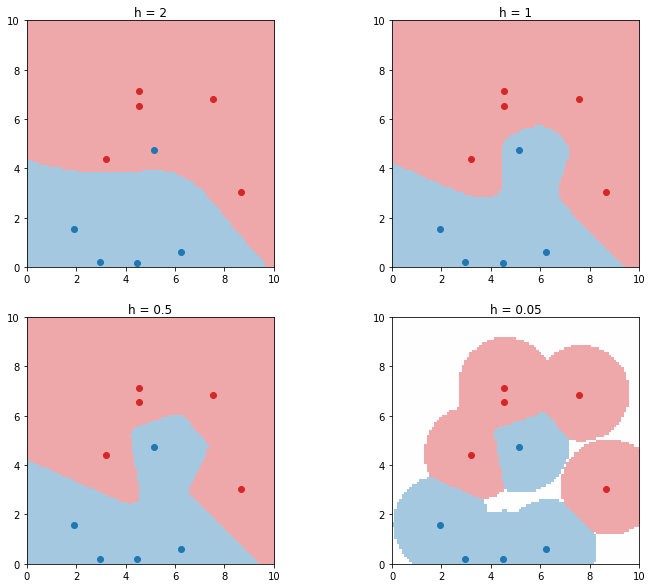

In [20]:
hs = [2, 1, 0.5, 0.05]
xs = np.arange(0, 10, 0.1)
ys = np.arange(0, 10, 0.1)
for i,h in enumerate(hs):
    plt.subplot(2,2,i+1)

    classifications = [[
            class_conditional_kernel_classifier((x, y), classData2D, h, multivariate_gaussian_kernel)
        for x in xs] for y in ys]

    plt.imshow(classifications, extent=(0,10,0,10), cmap=colormap, origin='lower')
    for c, data in enumerate(classData2D):
        plt.title("h = {}".format(h))
        plt.plot(*zip(*data), 'o', color=colors[c])

### EQ (8.16) classifier based on knn estimator

In [21]:
def euclidean_dist(a_tup, b_tup):
    return math.sqrt(sum((a-b)**2 for a,b in zip(a_tup, b_tup)))

def knn_classifier(x_tup, data, k):
    all_data = [dat for class_dat in data for dat in class_dat]
    all_dists = [euclidean_dist(x_tup, dat) for dat in all_data]
    r = sorted(all_dists)[k-1]
    
    class_responses = [
        sum(1 for dat in class_data if euclidean_dist(dat, x_tup) <= r)/k
        for c, class_data in enumerate(data)
    ]
    
    return class_responses.index(max(class_responses))

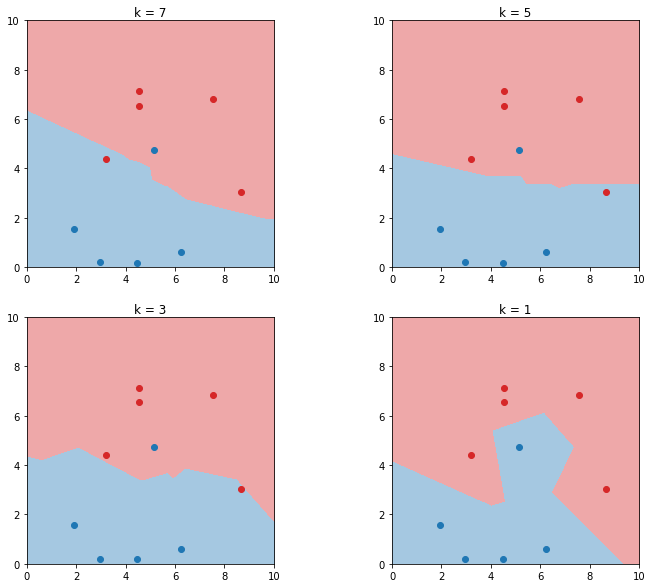

In [22]:
ks = [7, 5, 3, 1]
xs = np.arange(0, 10, 0.01)
ys = np.arange(0, 10, 0.01)
for i,k in enumerate(ks):
    plt.subplot(2,2,i+1)

    classifications = [[
            knn_classifier((x, y), classData2D, k)
        for x in xs] for y in ys]

    plt.imshow(classifications, extent=(0,10,0,10), cmap=colormap, origin='lower')
    plt.title("k = {}".format(k))
    for c, data in enumerate(classData2D):
        plt.plot(*zip(*data), 'o', color=colors[c])

# 8.5 Nearest Neighbor Condensation

In [23]:
def condensed_nearest_neighbor(data):
    data_prepared = [(x, y, c) for c, tup_list in enumerate(data) for (x, y) in tup_list]
    random.shuffle(data_prepared)
    Z = []
    Z_tmp = [data_prepared[0]]
    while Z != Z_tmp:
        Z = Z_tmp
        for (x, y, c) in data_prepared[1:]:
            nearest = (None, math.inf)
            for (x2, y2, c2) in Z:
                dist = math.sqrt((x-x2)**2 + (y-y2)**2)
                if dist < nearest[1]:
                    nearest = ((x2, y2, c2), dist)
            if nearest[0][2] != c:
                Z.append((x, y, c))
    Z_retransformed = [[(x, y) for (x, y, c2) in Z if c2 == c] for c in range(len(data))]
    return Z_retransformed

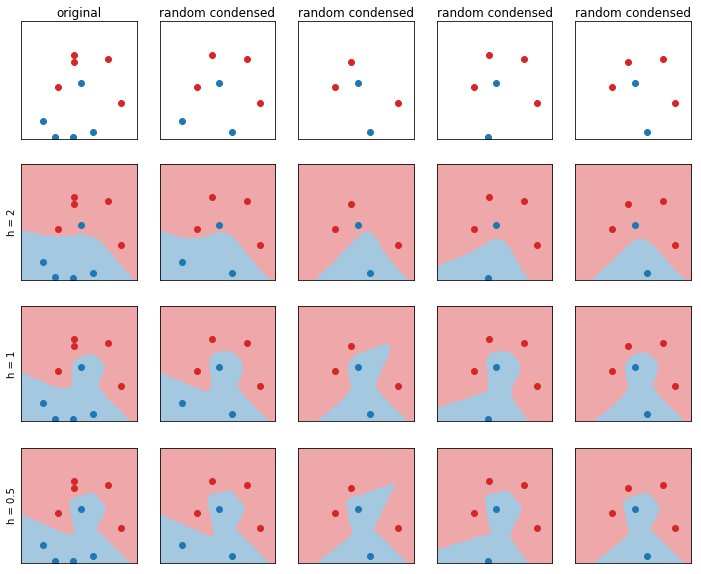

In [24]:
random.seed(42)
num_trials = 4
datasets = [classData2D] + [condensed_nearest_neighbor(classData2D) for _ in range(num_trials)]

hs = [2, 1, 0.5]
xs = np.arange(0, 10, 0.1)
ys = np.arange(0, 10, 0.1)
r = len(hs)+1
c = num_trials+1

titles = ['original']+['random condensed']*num_trials

for j, dataset in enumerate(datasets):
    plt.subplot(r,c,j+1)
    for col, data in enumerate(dataset):
        plt.plot(*zip(*data), 'o', color=colors[col])
        plt.xlim(0, 10)
        plt.ylim(0, 10)
        plt.xticks([])
        plt.yticks([])
        plt.title(titles[j])

for i,h in enumerate(hs):
    for j, dataset in enumerate(datasets):
        plt.subplot(r,c,(i+1)*c + j+1)

        classifications = [[
                class_conditional_kernel_classifier((x, y), dataset, h, multivariate_gaussian_kernel)
            for x in xs] for y in ys]

        plt.imshow(classifications, extent=(0,10,0,10), cmap=colormap, origin='lower')
        for col, data in enumerate(dataset):
            plt.plot(*zip(*data), 'o', color=colors[col])
        plt.xticks([])
        plt.yticks([])
        if j == 0:
            plt.ylabel("h = {}".format(h))


# 8.6 Distance Based Classification

In [25]:
def nn_classifier(x_tup, data, dist):
    
    nearest = (None, math.inf)
    for c, class_data in enumerate(data):
        for dat in class_data:
            d = dist(dat, x_tup)
            if d < nearest[1]:
                nearest = (c, d)
    
    return nearest[0]

### Test again with euclidean, based on EQ (8.16)

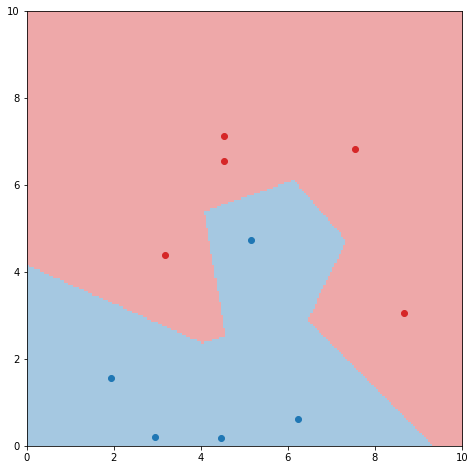

In [26]:
xs = np.arange(0, 10, 0.05)
ys = np.arange(0, 10, 0.05)

classifications = [[nn_classifier((x, y), classData2D, euclidean_dist) for x in xs] for y in ys]

plt.figure(figsize=(10, 8))
plt.imshow(classifications, extent=(0,10,0,10), cmap=colormap, origin='lower')
for c, data in enumerate(classData2D):
    plt.plot(*zip(*data), 'o', color=colors[c])

In [27]:
smoothData = [(0.3, 1), (0.8, 1.5), (0.9, 2), (1.8, -1.6),
              (2.3, -1.8), (4, 2.8), (4.2, 2.2), (5.5, 2.3),
              (5.7, 2.6), (6.1, 1.6), (6.5, 0.5), (7.4, 2.1)]

In [28]:
def running_mean_smoother(x, data, h):
    return sum(
        (abs((x-x_t)/h) < 1)*r_t
        for x_t, r_t in data
    ) / sum(
        abs((x-x_t)/h) < 1
        for x_t, r_t in data
    )

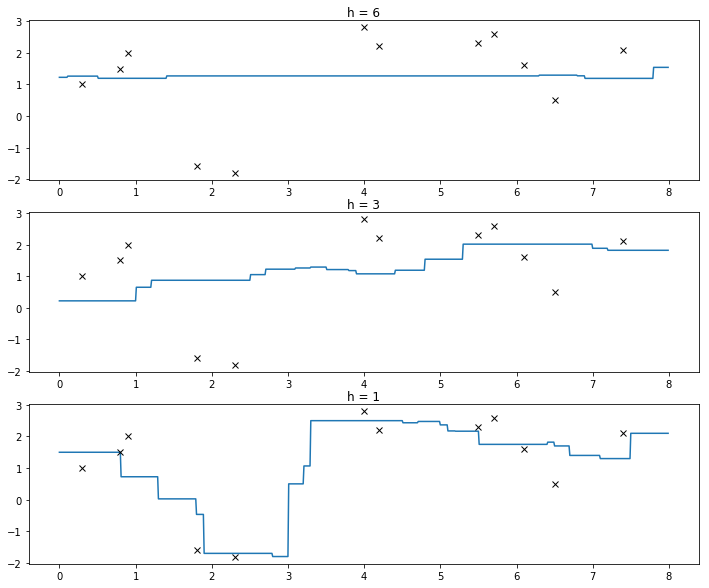

In [29]:
hs = [6, 3, 1]
xs = np.arange(0, 8, 0.01)
r = len(hs)

for i, h in enumerate(hs):
    plt.subplot(r, 1, i+1)
    plt.plot(xs, [running_mean_smoother(x, smoothData, h) for x in xs])
    plt.plot(*zip(*smoothData), 'xk')
    plt.title("h = {}".format(h))

In [30]:
def kernel_smoother(x, data, h):
    return sum(
        gaussian_kernel((x-x_t)/h)*r_t
        for x_t, r_t in data
    ) / sum(
        gaussian_kernel((x-x_t)/h)
        for x_t, r_t in data
    )

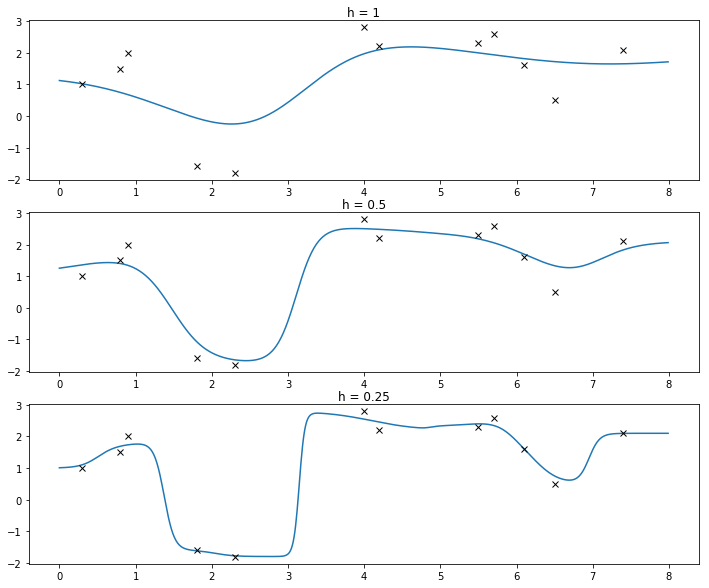

In [31]:
hs = [1, 0.5, 0.25]
xs = np.arange(0, 8, 0.01)
r = len(hs)

for i, h in enumerate(hs):
    plt.subplot(r, 1, i+1)
    plt.plot(xs, [kernel_smoother(x, smoothData, h) for x in xs])
    plt.plot(*zip(*smoothData), 'xk')
    plt.title("h = {}".format(h))

In [32]:
from scipy.stats import linregress
def running_line_smoother(x, data, h):
    neighbors = [(x_t, y_t) for x_t, y_t in data if abs(x_t-x) <= h]
    m, b, *_ = linregress(*zip(*neighbors))
    return m*x + b

/Users/pfaion/.virtualenvs/NonparametricMethods/lib/python3.5/site-packages/scipy/stats/_stats_mstats_common.py:97: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/pfaion/.virtualenvs/NonparametricMethods/lib/python3.5/site-packages/scipy/stats/_stats_mstats_common.py:97: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


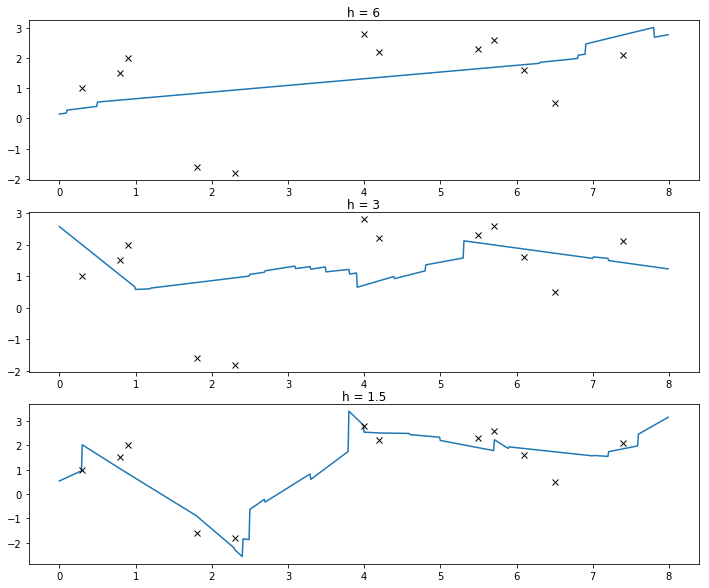

In [33]:
hs = [6, 3, 1.5]
xs = np.arange(0, 8, 0.01)
r = len(hs)

for i, h in enumerate(hs):
    plt.subplot(r, 1, i+1)
    plt.plot(xs, [running_line_smoother(x, smoothData, h) for x in xs])
    plt.plot(*zip(*smoothData), 'xk')
    plt.title("h = {}".format(h))